<a href="https://colab.research.google.com/github/petermr/semanticClimate/blob/main/outreach/piaget_hackathon/ipcc_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Colab Notebook is a part of Post Hackthon Pitch to SDG Accelerator, Geneva. 

- [Presentation Video](https://youtu.be/0MGXic-uEQY): 12 min. video on YouTube
- [Slides (PPT)](https://github.com/petermr/semanticClimate/blob/main/outreach/piaget_hackathon/post_hackathon_pitch_v3.pptx)

## Install packages

In [ ]:
!pip install wikipedia #to scrape wikipedia for climate-related terms
!pip install docanalysis # Semantic Climate's tool to search using existing dictionaries and create new ones from scratch
!pip install wordcloud # to represent search results as Wordclouds
!docanalysis --help

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=4ff7ade9117946d5efde9d6f0a252b2bc33042c20c8d4132dcd0c7719bcd47d3
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 44 kB 2.3 MB/s 
     |████████████████████████████████| 97 kB 4.0 MB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 
     |████████████████████████████████| 6.4 MB 19.6 MB/s 
     |████████████████████████████████| 1.5 MB 19.2 MB/s 
     |████████████████████████████████| 11.3 MB 18.3 MB/s 
     |████████████████████████████████| 14.3 MB 32.8 MB/s 
     |████████████████████████████████| 44 kB 2.0 MB/s 
     |████████████████████████████████| 280 kB 38.1 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.7/dist-packages/_distutils_hack/__init__.py:36: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
usage: docanalysis [-h] [--run_pygetpapers] [--make_section] [-q QUERY]
                   [-k HITS] [--project_name PROJECT_NAME]
                   [-d [DICTIONARY [DICTIONARY ...]]] [-o OUTPUT]
                   [--make_ami_dict MAKE_AMI_DICT]
                   [--search_section [SEARCH_SECTION [SEARCH_SECTION ...]]]
                   [--entities [ENTITIES [ENTITIES ...]]]
                   [--spacy_model SPACY_MODEL] [--html HTML]
                   [--synonyms SYNONYMS] [--make_json MAKE_JSON]
   

In [ ]:
# importing all packages
from pprint import pprint
import wikipedia
from bs4 import BeautifulSoup # to parse html and pull out text
import re
import requests
import os
from lxml import etree # to create dictionaries 
from collections import Counter
import json
from wordcloud import WordCloud

## Get HTML

[`pyami`](https://github.com/petermr/pyami) converts PDF IPCC Reports into HTMLs that we store in our SemanticClimate GitHub Repository. You can find them, [here](https://github.com/petermr/semanticClimate/tree/main/ipcc/ar6/wg3).

In [ ]:
# python dictionary with links to raw IPCC reports HTML
dict_with_ipcc_html_links = {
    "chap01":"https://raw.githubusercontent.com/petermr/semanticClimate/main/ipcc/ar6/wg3/Chapter01/fulltext.flow.html",
    "chap04":"https://raw.githubusercontent.com/petermr/semanticClimate/main/ipcc/ar6/wg3/Chapter04/fulltext.flow.html",
    "chap06":"https://raw.githubusercontent.com/petermr/semanticClimate/main/ipcc/ar6/wg3/Chapter06/fulltext.flow.html",
    "chap07":"https://raw.githubusercontent.com/petermr/semanticClimate/main/ipcc/ar6/wg3/Chapter07/fulltext.flow.html",
    "chap15":"https://raw.githubusercontent.com/petermr/semanticClimate/main/ipcc/ar6/wg3/Chapter15/fulltext.flow.html",
    "chap16":"https://raw.githubusercontent.com/petermr/semanticClimate/main/ipcc/ar6/wg3/Chapter16/fulltext.flow.html"
}

In [ ]:
# write raw HTML to sections folder
HTML = 'fulltext.flow.html'
FOLDER = 'ipcc/'

# Part of this code comes from Ananya Singha's notebook
for key,value in dict_with_ipcc_html_links.items():
    SUB_FOLDER = FOLDER + f"{key}/sections/"
    if not os.path.exists(SUB_FOLDER):
       os.makedirs(SUB_FOLDER)
    page = requests.get(value)
    with open(SUB_FOLDER + HTML , 'wb+') as f:
        f.write(page.content)

## Extract abbreviations using [`docanalysis`](https://github.com/petermr/docanalysis) and write to an ami-dictionary

In [ ]:
!docanalysis --project_name ipcc --extract_abb all_chap --output abb.csv --make_json all_abb.json --search_html

/usr/local/lib/python3.7/dist-packages/_distutils_hack/__init__.py:36: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
100% 6/6 [00:16<00:00,  2.78s/it]
INFO: Found 31700 sentences in the section(s).
377it [02:58,  2.11it/s]
INFO: wrote all abbreviations to ami dict /content/ipcc/all_chap.xml
/usr/local/lib/python3.7/dist-packages/docanalysis/entity_extraction.py:453: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  "[", "").str.replace("]", "")
INFO: wrote output to /content/ipcc/abb.csv
INFO: wrote JSON output to /content/ipcc/all_abb.json


## Example Output (ami-dict)
```
<entry name="VRE" term="Variable Renewable Energy" wikidataID="['//www.wikidata.org/wiki/Q7915732']"/>
  <entry name="SDGs" term="sustainable development goals" wikidataID="['//www.wikidata.org/wiki/Q7649586', '//www.wikidata.org/wiki/Q22547988', '//www.wikidata.org/wiki/Q30252260', '//www.wikidata.org/wiki/Q104759743', '//www.wikidata.org/wiki/Q111643133', '//www.wikidata.org/wiki/Q109354788', '//www.wikidata.org/wiki/Q104856926']"/>
  <entry name="TPES" term="total primary energy  supply" wikidataID="[]"/>
  <entry name="TFC" term="total final energy consumption" wikidataID="[]"/>
  <entry name="CSP" term="Concentrating  solar  power" wikidataID="[]"/>
  <entry name="LIBs" term="lithium-ion batteries" wikidataID="['//www.wikidata.org/wiki/Q106988181', '//www.wikidata.org/wiki/Q56157763', '//www.wikidata.org/wiki/Q57959688', '//www.wikidata.org/wiki/Q56157653']"/>
```

## Example Output (as JSON)

```
    "31": {
        "file_path": "/content/ipcc_2/chap16/sections/fulltext.flow.html",
        "sentence": "However, there is a growing body of evidence from developing  countries and small island developing states (SIDS) {16.4, 16.4.4.3, 16.4.4.4, 16.5, 16.7}.",
        "section": "HTML",
        "abb": {
            "SIDS": "small island developing states"
        }
    },
    "57": {
        "file_path": "/content/ipcc_2/chap16/sections/fulltext.flow.html",
        "sentence": "Sustainable  solutions  require  adoption  and  mainstreaming  of  locally  novel  technologies  that  can  meet  local  needs,  and  simultaneously  address  the  Sustainable  Development Goals (SDGs).",
        "section": "HTML",
        "abb": {
            "SDGs": "Sustainable  Development Goals"
        }
    },
    "74": {
        "file_path": "/content/ipcc_2/chap16/sections/fulltext.flow.html",
        "sentence": "Furthermore,  methodological  developments  to  improve  the  ability  of  Integrated  Assessment  Models (IAMs) to capture energy innovation system dynamics, and the relevant institutions and  policies  (including  design  and  implementation),  would  allow  for  more  realistic  assessment.",
        "section": "HTML",
        "abb": {
            "IAMs": "Integrated  Assessment  Models"
        }
    },
    "146": {
        "file_path": "/content/ipcc_2/chap16/sections/fulltext.flow.html",
        "sentence": "The  section  also  describes the different phases of innovation and metrics, such as the widely used but also criticized  technology readiness levels (TRLs).",
        "section": "HTML",
        "abb": {
            "TRLs": "technology readiness levels"
        }
    }
```

## Make dictionary by extracting terms from Wikipedia

In Part 1, we created dictionary by extracting information from the reports itself. These types of dictionaries are used to index HTML. 

In this part, Part 2, we'll show you how to create dictionaries from other sources and databases. We can use these dictionaries to search the HTML reports. 

In [ ]:
def get_raw_wikipedia_html(title_of_page):
  raw_html = wikipedia.WikipediaPage(title_of_page).html()
  return raw_html

def get_terms(raw_html, find_element = "dt"):
  soup = BeautifulSoup(raw_html, 'html.parser')
  climate_term = []
  black_list = ['climate', 'climate change']
  for term in soup.find_all(find_element):
      our_term = term.text.replace('\n', ' ')
      clean_term = re.sub(r'\([^()]*\)', '', our_term)
      if clean_term not in black_list:
        climate_term.append(clean_term)
  return climate_term

def write_to_dict(climate_term, title):
    dictionary_element = etree.Element("dictionary")
    dictionary_element.attrib['title'] = title
    for term in climate_term:
        entry_element = etree.SubElement(dictionary_element, "entry")
        entry_element.attrib['term'] = term
    xml_dict = etree.tostring(dictionary_element, pretty_print=True).decode('utf-8')

    with open(f'{title}.xml', mode='w', encoding='utf-8') as f:
        f.write(xml_dict)

In [ ]:
# Good starting point to create climate terms dictionary: https://en.wikipedia.org/wiki/Glossary_of_climate_change
title_of_page = "Glossary of climate change" 
raw_html = get_raw_wikipedia_html(title_of_page)
climate_term = get_terms(raw_html)
write_to_dict(climate_term, 'climate_terms')

## Search reports for the terms from Climate Terms ami-dictionary

In [ ]:
!docanalysis --project_name ipcc --search_html --dictionary /content/climate_terms.xml --output climate_terms.csv --make_json climate_terms.json

/usr/local/lib/python3.7/dist-packages/_distutils_hack/__init__.py:36: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
100% 6/6 [00:17<00:00,  2.85s/it]
INFO: Found 31700 sentences in the section(s).
INFO: getting terms from /content/climate_terms.xml
100% 31700/31700 [00:12<00:00, 2457.49it/s]
/usr/local/lib/python3.7/dist-packages/docanalysis/entity_extraction.py:453: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  "[", "").str.replace("]", "")
INFO: wrote output to /content/ipcc/climate_terms.csv
INFO: wrote JSON output to /content/ipcc/climate_terms.json


In [ ]:
# finding out the most common climate-related terms mentioned in the reports
PATH = '/content/ipcc/climate_terms.json'
with open(PATH, 'r') as f:
    json_dict = json.load(f)

country_list = []
for key, value in json_dict.items():
  country_list.extend(value["0"])
country = [item for sublist in country_list for item in sublist]
pprint(Counter(country))

Counter({'adaptation': 286,
         'fossil fuel': 111,
         'methane': 107,
         'anthropogenic': 83,
         'greenhouse gas': 81,
         'climate change mitigation': 66,
         'ecosystem services': 48,
         'weather': 44,
         'carbon sequestration': 35,
         'global warming ': 33,
         'carbon dioxide': 33,
         'carbon tax': 21,
         'desertification': 18,
         'additionality': 18,
         'nitrous oxide': 16,
         'feedback': 15,
         'carbon sink': 13,
         'climate justice': 13,
         'albedo': 12,
         'enteric fermentation': 11,
         'carbon footprint': 9,
         'emissions trading': 9,
         'proxy': 9,
         'climate variability': 7,
         'ozone': 5,
         'insolation': 4,
         'climate resilience': 4,
         'Kyoto Protocol': 4,
         'climate forcing': 3,
         'carbon cycle': 3,
         'radiative forcing': 3,
         'cap and trade': 3,
         'Holocene': 3,
         'clima

In [ ]:
# generating wordcloud from search hits
wc = WordCloud(background_color='white', width = 700, height=300, margin=1)
wc.fit_words(Counter(country))
wc.to_file('climate_terms.png')

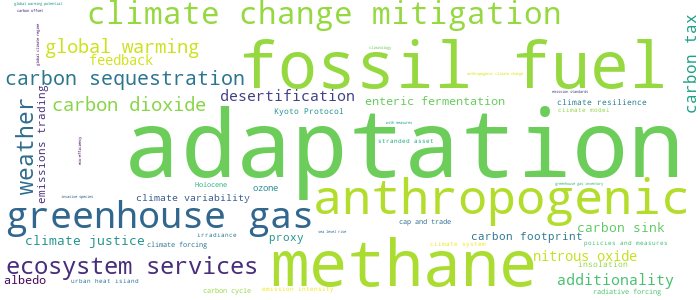

In [ ]:
from IPython.display import Image
Image('/content/climate_terms.png')